# RL Course by David Silver
## Lecture 8 : Integrating Learning and Planning
Dyna-Q Algorithm
<img src="Dyna-Q.png" width="80%"></img>
Example: Dyna-Q on a Simple Maze
<img src="SimpleMaze.png"></img>

In [51]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from random import randint

In [52]:
class Grid:
    '''One single grid in the maze.
    '''
    def __init__(self, isPassable = True, isTerminate = False, reward = 0):
        self.__isPassable = isPassable
        self.__isTerminate = isTerminate
        self.__reward = reward
    def toTuple(self):
        return (self.__isPassable, self.__isTerminate, self.__reward)
    
class SimpleMaze:
    '''Simple Maze game.
    '''
    def __init__(self, Map):
        self.__map = Map
        self.__map_width = Map.shape[1]
        self.__map_height = Map.shape[0]
        self.__actions = {
        'n' : np.asarray([-1, 0]),
        's' : np.asarray([1, 0]),
        'w' : np.asarray([0, -1]),
        'e' : np.asarray([0, 1])
        }
        
    def __grid_at(self, position):
        return self.__map[position[0], position[1]]
    
    def move(self, position, move_direction):
        next_position = position + self.__actions[move_direction]
        # horizontal boundary check
        if (next_position[1] < 0 or next_position[1] >= self.__map_width):
            next_position = position
        # vertical boundary check
        elif (next_position[0] < 0 or next_position[0] >= self.__map_height):
            next_position = position
        # barrier check
        elif self.__grid_at(next_position)['isPassable'] == False:
            next_position = position
        reward = -1 + self.__grid_at(next_position)['reward']
        return reward, next_position
    
    def isTerminate(self, position):
        return self.__grid_at(position)['isTerminate'] == True

In [53]:
alpha = 0.5
gamma = 0.5
MAZE_WIDTH = 9
MAZE_HEIGHT = 6
Terminate_Positions = ([0, 8],)
Barrier_Positions = ([1, 2], [2, 2], [3, 2],
                    [0, 7], [1, 7], [2, 7],
                    [4,5])
Start_Position = [3, 0]
Directions = ('e', 'w', 'n', 's')
normal_grid = Grid()
barrier_grid = Grid(isPassable=False)
terminate_grid = Grid(isTerminate=True)
grid_type = np.dtype([
    ('isPassable', 'b'),
    ('isTerminate', 'b'),
    ('reward', 'i1')
])
Map = np.zeros([MAZE_HEIGHT, MAZE_WIDTH], dtype=grid_type)
Map.fill(normal_grid.toTuple())
for pos in Terminate_Positions:
    Map[pos[0], pos[1]] = terminate_grid.toTuple()
for pos in Barrier_Positions:
    Map[pos[0],pos[1]] = barrier_grid.toTuple()

In [54]:
MazeGame = SimpleMaze(Map)
Q = {} # Q(S, A) 
for x in range(Map.shape[0]):
    for y in range(Map.shape[1]):
        position = np.asarray([x,y]).tostring()
        Q.setdefault(position,{})
        for direction in Directions:
            Q[position].setdefault(direction, 0)
def greedy(Q, position):
    actions = sorted(Q[position.tostring()].items(), key = lambda x:x[1], reverse= True)
    if actions[0][1] == actions[3][1]:
        direction = Directions[randint(0,3)]
    else:
        direction = actions[0][0]
    return direction

In [55]:
episode = 0
steps = 0
result = []
while episode < 50:
    position = np.asarray(Start_Position)
    move_direction = greedy(Q, position)
    while True:
        reward, next_position = MazeGame.move(position, move_direction)
        next_direction = greedy(Q, next_position)
        Q[position.tostring()][move_direction] += alpha * (reward + 
                                                          gamma * Q[next_position.tostring()][next_direction]
                                                          - Q[position.tostring()][move_direction])
        position = next_position
        move_direction = next_direction
        if MazeGame.isTerminate(position) == True:
            break
        steps += 1
    result.append(steps)
    steps = 0
    episode += 1

In [56]:
x = np.arange(0, episode)
y = np.asarray(result)

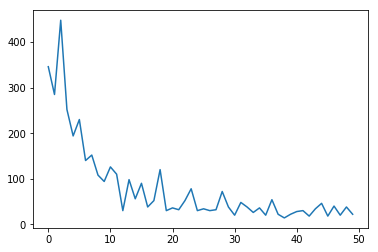

In [58]:
plt.plot(x, y)

In [44]:
Q[np.asarray([1,8]).tostring()]

{'e': -1.21875, 'w': -1.21875, 'n': -1.0, 's': -1.078125}